In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Conv2D, BatchNormalization,ReLU, Add, MaxPool2D, GlobalAvgPool2D,Dense,ReLU,Dropout,Flatten
from tensorflow.keras import Model
from keras.models import Sequential
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from tensorflow.keras.utils import plot_model 
warnings.simplefilter(action ='ignore', category = FutureWarning)
%matplotlib inline

**Import Data**

In [ ]:
train_path = '/content/drive/MyDrive/dataset/train'
valid_path = '/content/drive/MyDrive/dataset/validate'
test_path = '/content/drive/MyDrive/dataset/test'

In [ ]:
train_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
     .flow_from_directory(directory = train_path, target_size=(224,224), batch_size=16)
valid_batch =ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory = valid_path, target_size=(224,224), batch_size=16)
test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory = test_path, target_size=(224,224), batch_size=16, shuffle=False )

Found 3584 images belonging to 7 classes.
Found 896 images belonging to 7 classes.
Found 1120 images belonging to 7 classes.


In [ ]:
imgs, labels = next(train_batch)
y = labels

In [ ]:
# plot images in the form of grid with 1 row and 10 colomuns 
def plotImages(images_arr):
    fig, axes = plt.subplots(1,8 , figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


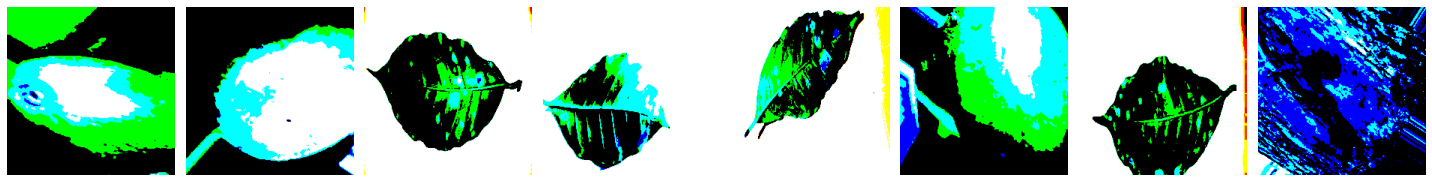

[[0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

Crate the model

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=7, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

**Train the Model**

In [ ]:
#sethyper parameters
Epoch = 100
FC_layers = 4096
Dropout_rate = 0.5
Batch_size = 5
learning_rate = 0.0001
momentum = 0.9

In [ ]:
opt = tf.keras.optimizers.SGD(
    learning_rate=learning_rate,
    momentum=momentum,
    name="SGD",
)

In [ ]:
model.compile(optimizer=opt, loss ='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#run for more epochs(~30) to get better result

history = model.fit(x=train_batch, validation_data = valid_batch, epochs=Epoch, verbose=1)

Epoch 1/100
224/224 [==============================] - 4509s 20s/step - loss: 1.8535 - accuracy: 0.2127 - val_loss: 1.1034 - val_accuracy: 0.6205
Epoch 2/100
224/224 [==============================] - 124s 554ms/step - loss: 1.1276 - accuracy: 0.5285 - val_loss: 0.9744 - val_accuracy: 0.6685
Epoch 3/100
224/224 [==============================] - 123s 551ms/step - loss: 0.7439 - accuracy: 0.7184 - val_loss: 0.8366 - val_accuracy: 0.6808
Epoch 4/100
224/224 [==============================] - 124s 551ms/step - loss: 0.6646 - accuracy: 0.7526 - val_loss: 0.9289 - val_accuracy: 0.6652
Epoch 5/100
224/224 [==============================] - 124s 551ms/step - loss: 0.6227 - accuracy: 0.7560 - val_loss: 0.6819 - val_accuracy: 0.7522
Epoch 6/100
224/224 [==============================] - 123s 550ms/step - loss: 0.5198 - accuracy: 0.8052 - val_loss: 0.6719 - val_accuracy: 0.7690
Epoch 7/100
224/224 [==============================] - 123s 550ms/step - loss: 0.4369 - accuracy: 0.8334 - val_loss: 0.

In [ ]:
np.mean(history.history['accuracy'])

0.951462054848671

In [ ]:
np.mean(history.history['val_accuracy'])

0.8959821420907974

In [ ]:
np.mean(history.history['loss'])

0.1316647727927193

In [ ]:
np.mean(history.history['val_loss'])

0.6112345924973488

**Plot Result**

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


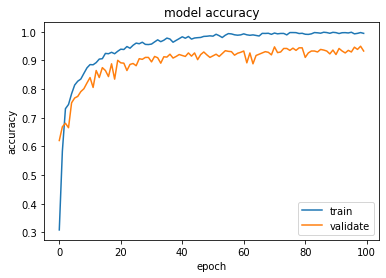

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()

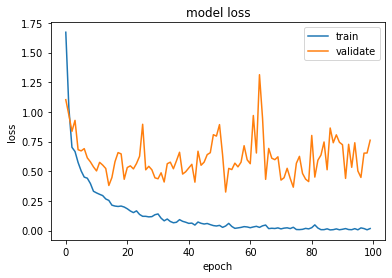

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()

**Make Prediction**

In [ ]:
prediction = model.predict(x=test_batch, verbose = 1)

70/70 [==============================] - 14s 202ms/step


**Plot Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_true=test_batch.classes, y_pred = np.argmax(prediction,axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Confusion matrix, without normalization
[[153   3   0   0   0   0   4]
 [ 10 149   1   0   0   0   0]
 [  0   0 154   0   3   3   0]
 [  1   0   0 158   0   1   0]
 [  1   0   7   0 152   0   0]
 [  0   0   0   0   0 160   0]
 [  0   0   0   0   0   0 160]]


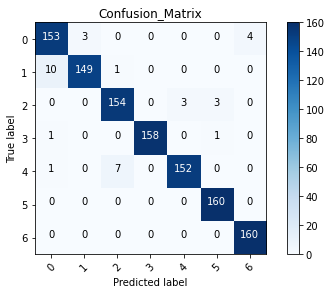

In [ ]:
cm_plot_labels =['0','1','2','3','4','5','6']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion_Matrix')

**Evaluate the Model**

In [ ]:
from sklearn.metrics import accuracy_score
y_true = test_batch.classes
y_pred = np.argmax(prediction,axis=-1)
Acc = accuracy_score(y_true, y_pred, normalize=True)*100
print('Evaluation Accuracy = %f '% Acc)

Evaluation Accuracy = 96.964286 


In [ ]:

from sklearn.metrics import classification_report
# Print the precision and recall, among other metrics
print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.927     0.956     0.942       160
           1      0.980     0.931     0.955       160
           2      0.951     0.963     0.957       160
           3      1.000     0.988     0.994       160
           4      0.981     0.950     0.965       160
           5      0.976     1.000     0.988       160
           6      0.976     1.000     0.988       160

    accuracy                          0.970      1120
   macro avg      0.970     0.970     0.970      1120
weighted avg      0.970     0.970     0.970      1120

